<a href="https://colab.research.google.com/github/Rohitshankaran/Projects-by-rohit-shankaran/blob/main/Loan%20prediction%20using%20maching%20learning%20techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import files
uploaded = files.upload()


Saving loan-predictionUC.csv.xlsx to loan-predictionUC.csv.xlsx


In [37]:
import pandas as pd

df = pd.read_excel('loan-predictionUC.csv.xlsx')  # Adjust the filename if needed


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [61]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,3,1


In [64]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.744300,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.758958,0.687296
std,0.421752,0.484971,1.009623,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.428629,0.352339,1.222629,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000,1.000000
max,2.000000,2.000000,3.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,4.000000,1.000000


In [78]:
print(df.tail())

      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
609  LP002978       0        0         0.0          0              0   
610  LP002979       1        1         3.0          0              0   
611  LP002983       1        1         1.0          0              0   
612  LP002984       1        1         2.0          0              0   
613  LP002990       0        0         0.0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Property_Area  Loan_Status  
609             1.0              0            1  
610             1.0         

In [74]:
# Check unique values in categorical columns
print(df['Gender'].value_counts())
print(df['Married'].value_counts())


Gender
1    489
0    112
2     13
Name: count, dtype: int64
Married
1    398
0    213
2      3
Name: count, dtype: int64


In [75]:
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [76]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 62.5+ KB
None


In [39]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [40]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [44]:
for col in df.columns:
  if df[col].dtype == 'object':
    if df[col].str.contains('3\+').any():
      print(f"Column '{col}' contains '3+' values.")

Column 'Dependents' contains '3+' values.


In [82]:
# Fix the 'Dependents' column
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

# If you still have missing values, fill them
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)


In [83]:
X = df.drop(columns=['Loan_Status', 'Loan_ID'])
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [84]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [85]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [86]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [87]:
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 1.0
Test Accuracy: 0.7850162866449512


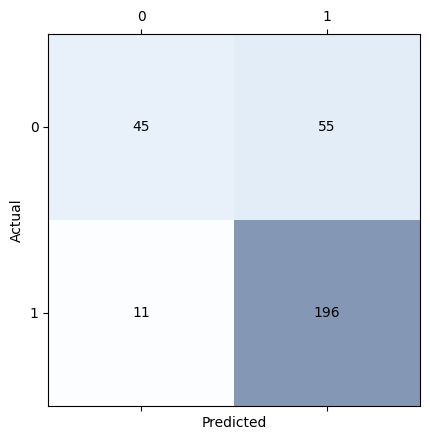

In [88]:
cm = confusion_matrix(y_test, y_test_pred)
plt.matshow(cm, cmap='Blues', alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()